In [121]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import joblib
warnings.filterwarnings("ignore")

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [123]:
df_crop_production = pd.read_csv("../../Datasets/OpDataset/crop_production_data.csv")
df_soil_analysis = pd.read_csv("../../Datasets/OpDataset/soil_analysis_data.csv")
df_water_usage = pd.read_csv("../../Datasets/OpDataset/water_usage_data.csv")

In [124]:
df_crop_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   District                  1000 non-null   object 
 1   Crop                      1000 non-null   object 
 2   Season                    1000 non-null   object 
 3   Area (hectares)           1000 non-null   float64
 4   Yield (quintals)          1000 non-null   float64
 5   Production (metric tons)  1000 non-null   float64
dtypes: float64(3), object(3)
memory usage: 47.0+ KB


In [125]:
df_soil_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   District                    1000 non-null   object 
 1   Soil Type                   1000 non-null   object 
 2   pH Level                    1000 non-null   float64
 3   Organic Matter (%)          1000 non-null   float64
 4   Nitrogen Content (kg/ha)    1000 non-null   float64
 5   Phosphorus Content (kg/ha)  1000 non-null   float64
 6   Potassium Content (kg/ha)   1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


In [126]:
df_water_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   District                             1000 non-null   object 
 1   Crop                                 1000 non-null   object 
 2   Irrigation Method                    1000 non-null   object 
 3   Water Consumption (liters/hectare)   1000 non-null   float64
 4   Water Availability (liters/hectare)  1000 non-null   float64
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


In [127]:
merge_soil_crop_production = df_crop_production.merge(df_soil_analysis, on = ['District'])

In [128]:
merge_water_soil_crop_production = merge_soil_crop_production.merge(df_water_usage, on = ['District', 'Crop'])

In [139]:
database = merge_water_soil_crop_production.copy()
database.tail()

,District,Crop,Season,Area (hectares),Yield (quintals),Production (metric tons),Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Irrigation Method,Water Consumption (liters/hectare),Water Availability (liters/hectare)
433575,Ajmer,Onion,Kharif,16967.70233,42.402728,7194.768632,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Sprinkler Irrigation,14264.932913,14988.961769
433576,Ajmer,Onion,Kharif,16967.70233,42.402728,7194.768632,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Canal Irrigation,11618.405254,11633.677144
433577,Ajmer,Onion,Kharif,16967.70233,42.402728,7194.768632,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Sprinkler Irrigation,10593.992074,11165.941371
433578,Ajmer,Onion,Kharif,16967.70233,42.402728,7194.768632,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Tube Well,15252.106647,15357.754437
433579,Ajmer,Onion,Kharif,16967.70233,42.402728,7194.768632,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Drip Irrigation,11927.850413,11650.678989


In [130]:
database = database.drop(columns = ['Production (metric tons)', 'Water Consumption (liters/hectare)'], axis = 1)
database.tail()

,District,Crop,Season,Area (hectares),Yield (quintals),Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Irrigation Method,Water Availability (liters/hectare)
433575,Ajmer,Onion,Kharif,16967.70233,42.402728,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Sprinkler Irrigation,14988.961769
433576,Ajmer,Onion,Kharif,16967.70233,42.402728,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Canal Irrigation,11633.677144
433577,Ajmer,Onion,Kharif,16967.70233,42.402728,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Sprinkler Irrigation,11165.941371
433578,Ajmer,Onion,Kharif,16967.70233,42.402728,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Tube Well,15357.754437
433579,Ajmer,Onion,Kharif,16967.70233,42.402728,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Drip Irrigation,11650.678989


In [131]:
database.isnull().sum()

District                               0
Crop                                   0
Season                                 0
Area (hectares)                        0
Yield (quintals)                       0
Soil Type                              0
pH Level                               0
Organic Matter (%)                     0
Nitrogen Content (kg/ha)               0
Phosphorus Content (kg/ha)             0
Potassium Content (kg/ha)              0
Irrigation Method                      0
Water Availability (liters/hectare)    0
dtype: int64

In [132]:
database.duplicated().sum()

0

In [133]:
X = database.drop(columns=['Yield (quintals)'])  # Features
y = database['Yield (quintals)']  # Target

In [137]:
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['District', 'Crop', 'Season', 'Soil Type', 'Irrigation Method']])
feature_names = encoder.get_feature_names_out(['District', 'Crop', 'Season', 'Soil Type', 'Irrigation Method'])
X_categorical = pd.DataFrame(X_encoded.toarray(), columns=feature_names)
X_numeric = X.drop(columns=['District', 'Crop', 'Season', 'Soil Type', 'Irrigation Method'])
#print(feature_names)
print(X_categorical.iloc[0])

District_Ajmer                            0.0
District_Alwar                            0.0
District_Bhilwara                         0.0
District_Hanumangarh                      0.0
District_Jaipur                           0.0
District_Jodhpur                          1.0
District_Kota                             0.0
District_Nagaur                           0.0
District_Sri Ganganagar                   0.0
District_Udaipur                          0.0
Crop_Bajra                                0.0
Crop_Barley                               0.0
Crop_Chilli                               0.0
Crop_Citrus                               0.0
Crop_Coriander                            0.0
Crop_Cotton                               0.0
Crop_Cumin                                0.0
Crop_Fennel                               0.0
Crop_Fenugreek                            0.0
Crop_Garlic                               0.0
Crop_Gram                                 0.0
Crop_Guava                        

In [135]:
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

In [136]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [138]:
X_processed = pd.concat([X_categorical, X_numeric], axis=1)
X_processed.head()

,District_Ajmer,District_Alwar,District_Bhilwara,District_Hanumangarh,District_Jaipur,District_Jodhpur,District_Kota,District_Nagaur,District_Sri Ganganagar,District_Udaipur,...,Irrigation Method_Drip Irrigation,Irrigation Method_Sprinkler Irrigation,Irrigation Method_Tube Well,Area (hectares),pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Water Availability (liters/hectare)
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,16490.142459,7.453182,2.662898,23.564182,13.014409,37.082003,10557.488279
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,16490.142459,7.453182,2.662898,23.564182,13.014409,37.082003,14448.126887
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,16490.142459,7.453182,2.662898,23.564182,13.014409,37.082003,8512.323275
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,16490.142459,7.453182,2.662898,23.564182,13.014409,37.082003,9434.989877
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,16490.142459,7.305740,2.095212,32.246094,17.450967,40.172205,10557.488279


In [76]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [77]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [78]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_val_scaled shape:", X_val_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (260148, 54)
X_val_scaled shape: (86716, 54)
X_test_scaled shape: (86716, 54)


In [79]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_reshaped = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [80]:
# Define the CNN mode

In [81]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

In [82]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [84]:
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/20
8130/8130 [==============================] - 105s 13ms/step - loss: 5.1402 - mae: 1.3774 - val_loss: 5.1648 - val_mae: 1.3798
Epoch 2/20
8130/8130 [==============================] - 111s 14ms/step - loss: 4.9301 - mae: 1.3503 - val_loss: 4.8342 - val_mae: 1.3005
Epoch 3/20
8130/8130 [==============================] - 115s 14ms/step - loss: 4.7580 - mae: 1.3159 - val_loss: 4.8261 - val_mae: 1.3158
Epoch 4/20
8130/8130 [==============================] - 114s 14ms/step - loss: 4.5936 - mae: 1.2900 - val_loss: 4.5948 - val_mae: 1.2867
Epoch 5/20
8130/8130 [==============================] - 119s 15ms/step - loss: 4.4912 - mae: 1.2675 - val_loss: 4.5585 - val_mae: 1.2992
Epoch 6/20
8130/8130 [==============================] - 123s 15ms/step - loss: 4.3535 - mae: 1.2496 - val_loss: 4.6548 - val_mae: 1.3082
Epoch 7/20
8130/8130 [==============================] - 127s 16ms/step - loss: 4.2565 - mae: 1.2332 - val_loss: 4.0319 - val_mae: 1.1520
Epoch 8/20
8130/8130 [===================

In [85]:
mse, mae = model.evaluate(X_test_reshaped, y_test)

2710/2710 [==============================] - 13s 5ms/step - loss: 3.0660 - mae: 1.0076


In [86]:
predictions = model.predict(X_test_reshaped)

2710/2710 [==============================] - 15s 5ms/step


In [87]:
r2_test = r2_score(y_test, predictions)

In [88]:
print(f"Mean Square Error: {mse:.4f}")
print(f"Root Mean Square Error: {np.sqrt(mse):.4f}")
print(f"R2 Score: {r2_test:.4f}")

Mean Square Error: 3.0660
Root Mean Square Error: 1.7510
R2 Score: 0.9552


In [89]:
# Plotting actual vs. predicted values

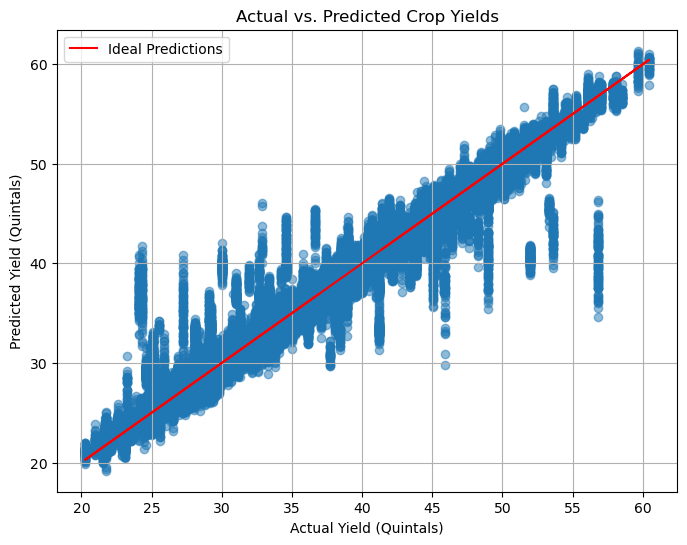

In [90]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot(y_test, y_test, color='red', label='Ideal Predictions')
plt.title('Actual vs. Predicted Crop Yields')
plt.xlabel('Actual Yield (Quintals)')
plt.ylabel('Predicted Yield (Quintals)')
plt.legend()
plt.grid(True)
plt.show()

In [91]:
model.save('model.h5')  # Save the entire model